<a href="https://colab.research.google.com/github/Faweenagua/ML-Course/blob/master/ML_Course_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:

url = 'https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/refs/heads/master/1000_Companies.csv'
companies = pd.read_csv(url)

X = companies.iloc[:, :-1].values
Y = companies.iloc[:, -1].values

In [ ]:
companies.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

<Axes: >

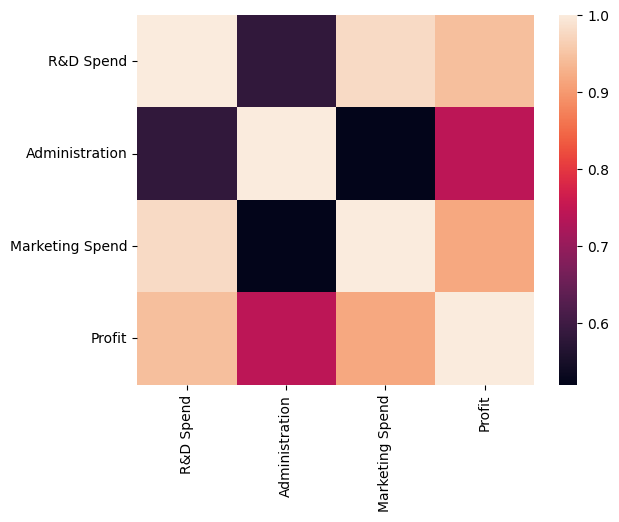

In [ ]:
sns.heatmap(companies.iloc[:, [0,1,2,4]].corr())

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Encode Country Column
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
ct = ColumnTransformer([("State", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [ ]:
X = X[:,1:]
print(X)

  (0, 994)	1.0
  (0, 995)	136897.8
  (0, 996)	471784.1
  (0, 997)	2.0
  (1, 993)	1.0
  (1, 995)	151377.59
  (1, 996)	443898.53
  (2, 945)	1.0
  (2, 995)	101145.55
  (2, 996)	407934.54
  (2, 997)	1.0
  (3, 894)	1.0
  (3, 995)	118671.85
  (3, 996)	383199.62
  (3, 997)	2.0
  (4, 880)	1.0
  (4, 995)	91391.77
  (4, 996)	366168.42
  (4, 997)	1.0
  (5, 800)	1.0
  (5, 995)	99814.71
  (5, 996)	362861.36
  (5, 997)	2.0
  (6, 820)	1.0
  (6, 995)	147198.87
  :	:
  (992, 996)	271621.8728
  (992, 997)	1.0
  (993, 278)	1.0
  (993, 995)	117368.4374
  (993, 996)	159075.908
  (994, 589)	1.0
  (994, 995)	124813.3635
  (994, 996)	256344.0701
  (994, 997)	2.0
  (995, 329)	1.0
  (995, 995)	118451.999
  (995, 996)	173232.6695
  (996, 824)	1.0
  (996, 995)	130390.08
  (996, 996)	329204.0228
  (997, 599)	1.0
  (997, 995)	241926.31
  (997, 996)	227142.82
  (998, 773)	1.0
  (998, 995)	321652.14
  (998, 996)	281692.32
  (999, 992)	1.0
  (999, 995)	270939.86
  (999, 996)	295442.17
  (999, 997)	2.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 89896.13560499,  88562.7510985 ,  94887.30651488, 174747.72024119,
        84341.06631261, 110900.5068446 , 169762.18978214,  91541.67798207,
       163730.72563258,  54998.2172938 ,  67560.89729613, 150188.77595598,
       126199.60384976,  60116.93668866, 175679.15927695,  76424.67318168,
       118585.29903439, 163025.85283669, 165373.46410705, 180816.33968362,
       101611.90106009,  85866.61261999, 179941.96171074,  84375.47086152,
       104774.82635605, 101085.99176858,  41176.34612916,  58397.55050486,
        69464.05397602, 226504.8942756 , 121059.90611777, 111345.24805148,
       102017.43089194, 137860.21445519,  64646.58374067, 108541.70028126,
       184674.67919827, 170603.23572359, 173734.0459172 , 118021.40069858,
        97366.10933445, 163884.28725275, 107433.20380329,  52036.91225739,
       116889.40855716,  59427.16828033, 157865.17674981,  79756.87553723,
       159147.37397118, 131189.93574445, 183744.07932316, 173699.64148382,
        93763.70569498,  

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8989590247099387

# **Logistic Regression**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

digits = load_digits()


In [ ]:
print("Image Data Shape:", digits.data.shape)
print("Label Data Shape:", digits.target.shape)

Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


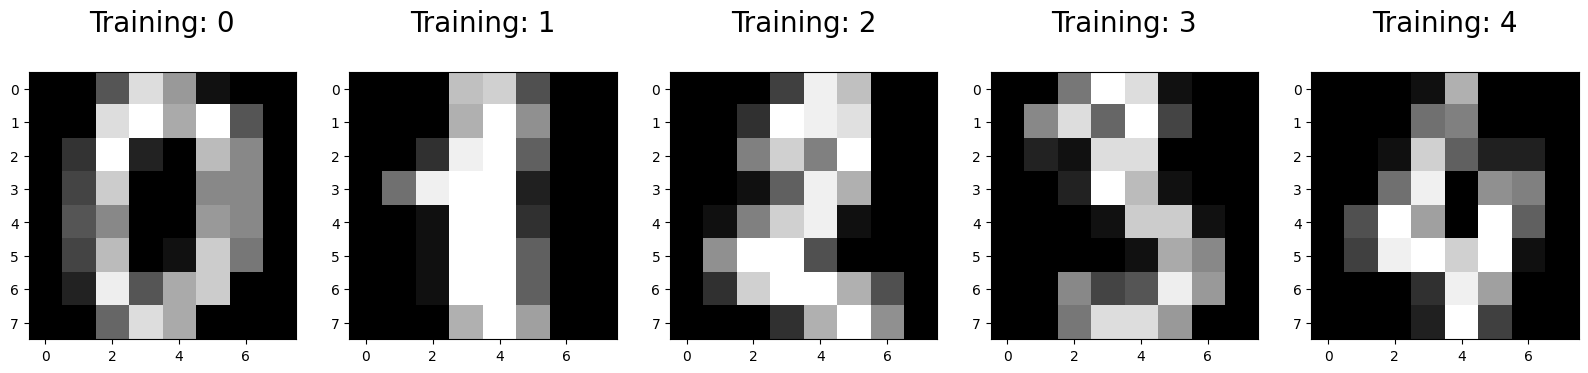

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1383, 64)
(414, 64)
(1383,)
(414,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=2000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[2]


In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9637681159420289


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  2]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  1  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  3  1  0  0  0  0  0 41  1]
 [ 0  0  0  0  0  1  0  0  0 42]]


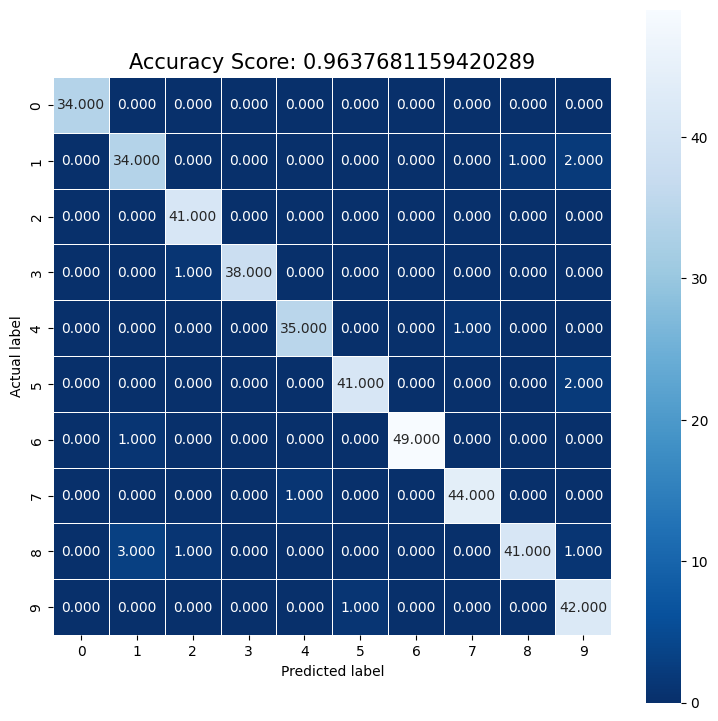

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
print(predictions)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 9 4 2 1 6 9 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3]


In [ ]:
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3]


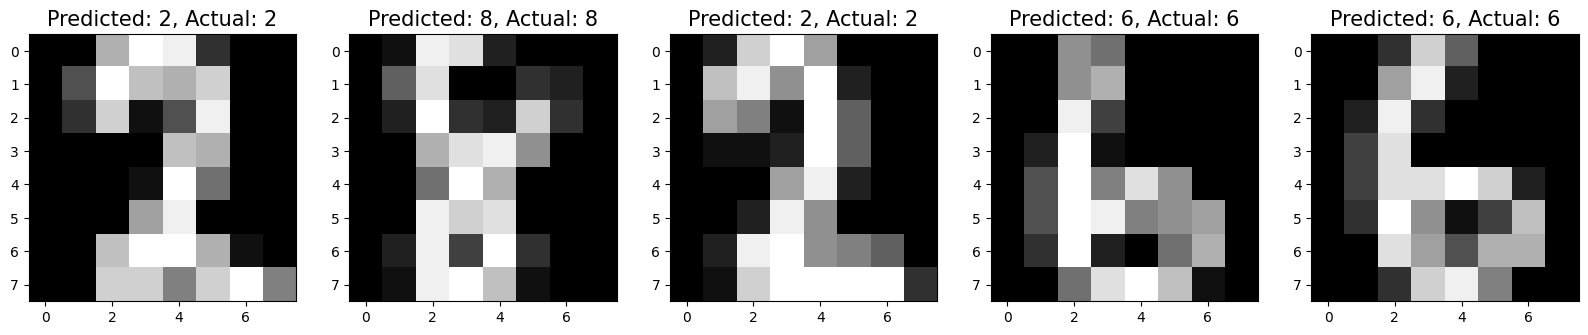

In [ ]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
  # print(predict, actual)
  if predict == actual:
    classifiedIndex.append(index)
  index +=1
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(classifiedIndex[0:5]):
  plt.subplot(1, 5, plotIndex +1)
  plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 15)

# print(predict)

# **K-Means Clustering**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

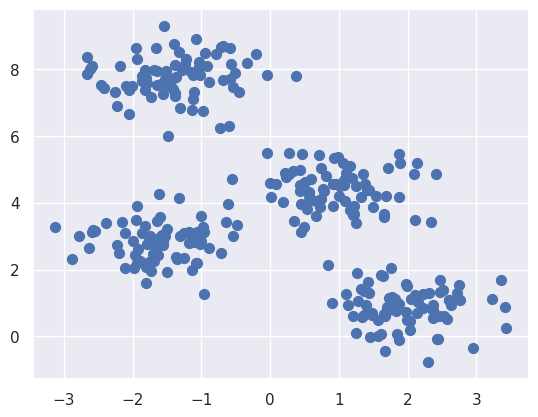

In [ ]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

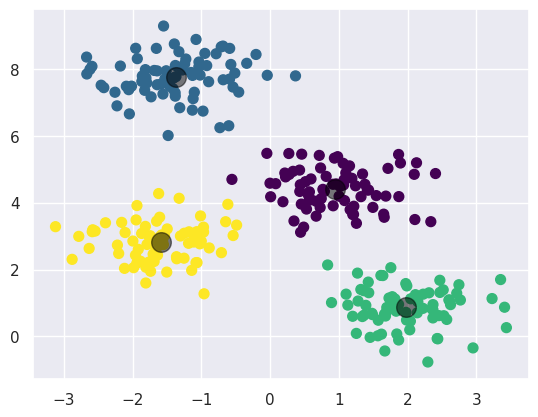

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
  # 1. Randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]

  while True:
    # 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)

    # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

    # 2c. Check for convergence
    if np.all(centers == new_centers):
      break
    centers = new_centers

  return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

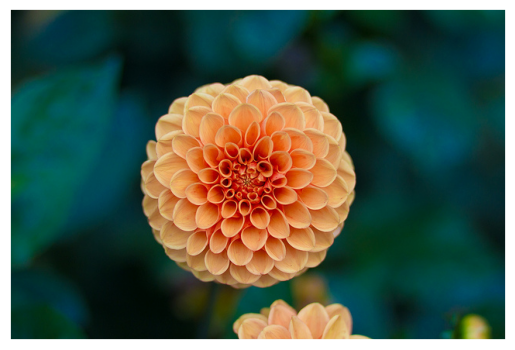

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
data = china / 255.0 #convert to 0 - 1
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data
  # chooose a random subset
  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

  fig.suptitle(title, size=20);

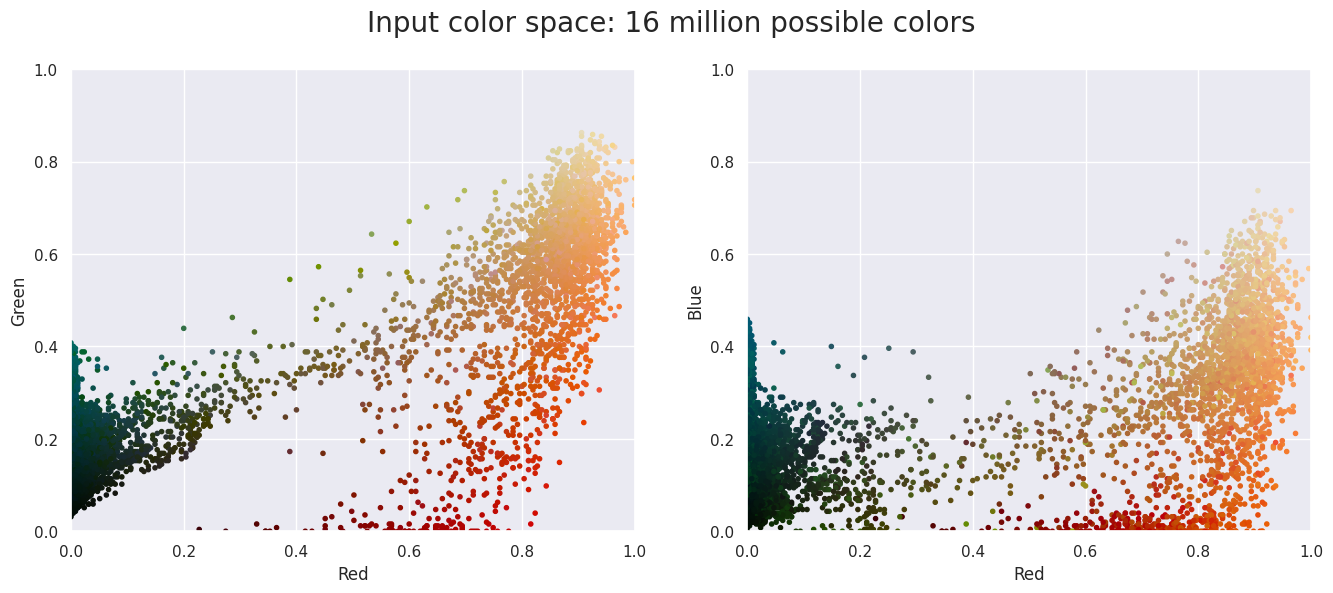

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

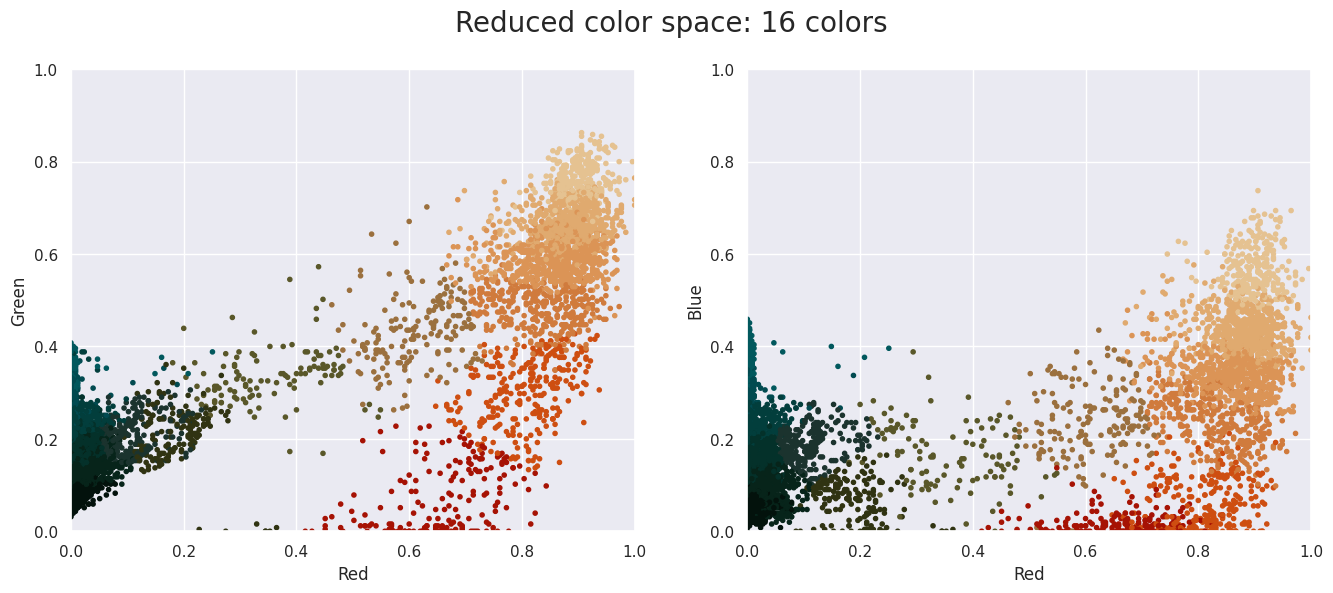

In [ ]:
import warnings; warnings.simplefilter('ignore') # fix numpy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")


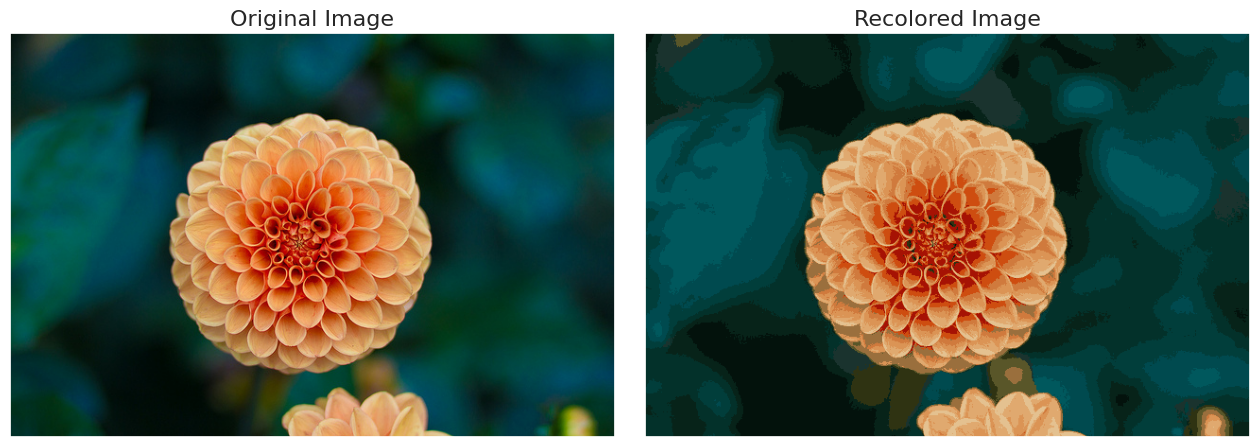

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('Recolored Image', size=16);

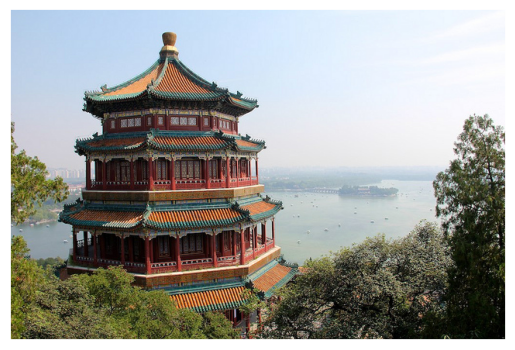

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
data = china / 255.0 #convert to 0 - 1
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

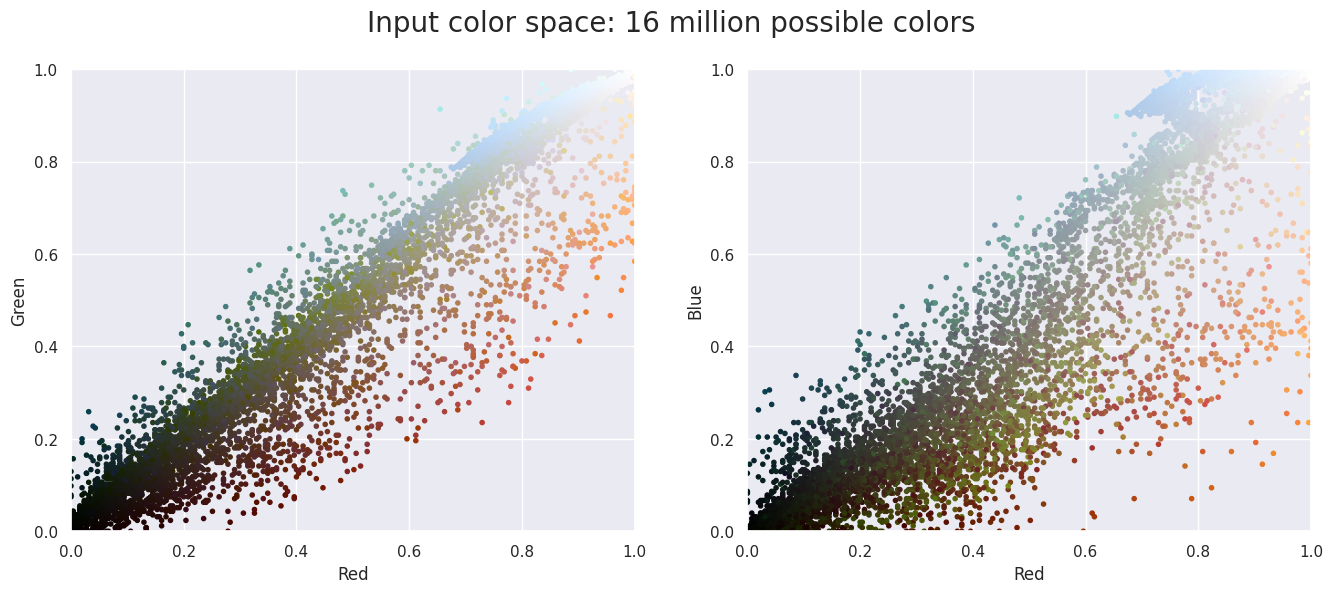

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

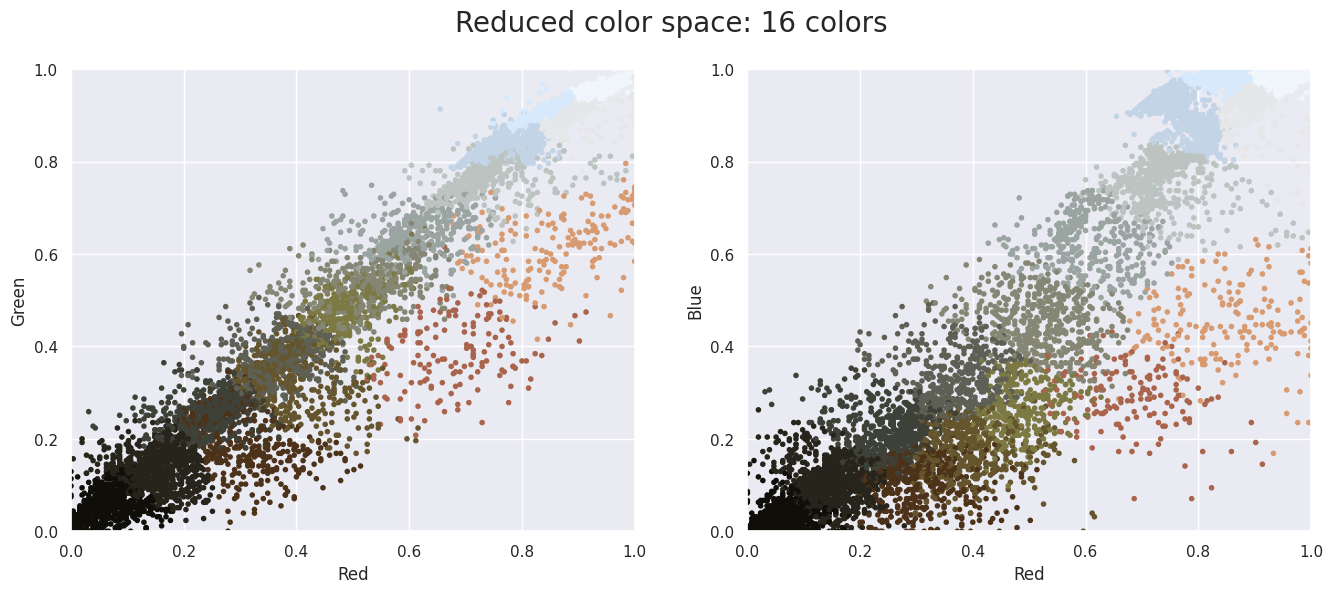

In [ ]:
import warnings; warnings.simplefilter('ignore') # fix numpy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

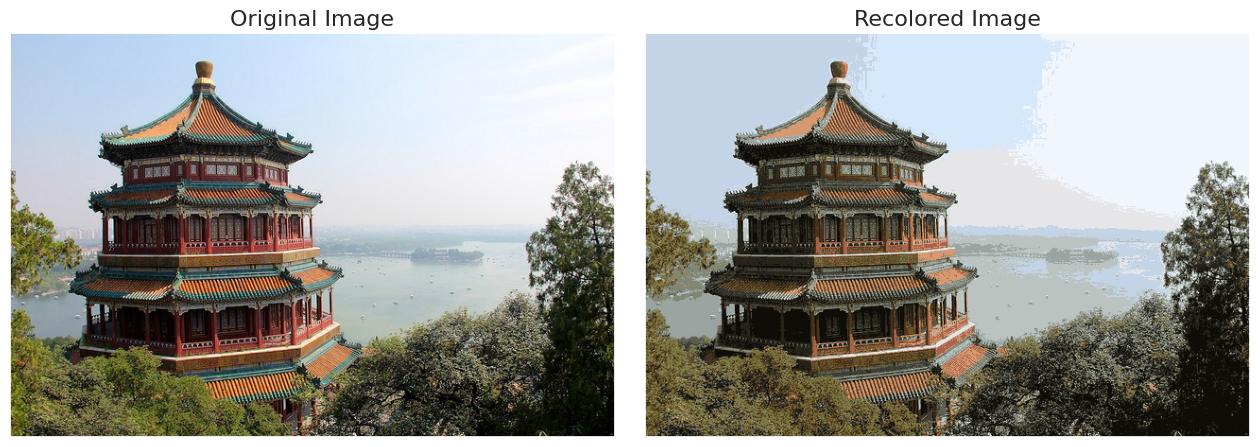

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('Recolored Image', size=16);

# **Decision Tree**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#loading data file
url = 'https://raw.githubusercontent.com/Faweenagua/ML-Course/refs/heads/master/data_2.csv'
balance_data = pd.read_csv(url)

In [3]:
balance_data.head()

Result  Initial payment  Last payment  Credit Score  House Number    sum
0    yes              201         10018           250          3046  13515
1    yes              205         10016           395          3044  13660
2    yes              257         10129           109          3251  13746
3    yes              246         10064           324          3137  13771
4    yes              117         10115           496          3094  13822

In [4]:
#Seperate the target variables
X = balance_data.values[:, 1:]
Y = balance_data.values[:, 0]

#splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#Function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [5]:
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

['yes' 'yes' 'No' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes'
 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes'
 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'yes'
 'yes' 'No' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'No'
 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'yes'
 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'No' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'No'
 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'No'

In [6]:
print(y_test)

['yes' 'yes' 'No' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes'
 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'yes' 'No' 'No' 'No' 'No' 'yes' 'No' 'yes' 'No' 'No' 'yes' 'No' 'yes'
 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'yes'
 'yes' 'No' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'No'
 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'yes'
 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'No' 'No' 'No' 'No' 'yes'
 'No' 'No' 'No' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'No'
 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'No'

In [7]:
print("Accuracy is", accuracy_score(y_test, y_pred_en)*100)

Accuracy is 100.0


# **RANDOM FOREST CLASSIFIER**

In [1]:
#loading the library with Iris dataset
from sklearn.datasets import load_iris
#loading scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
#loading pandas
import pandas as pd
#loading numpy
import numpy as np

#setting random seed
np.random.seed(0)

In [2]:
# creating an object called iris with the iris data
iris = load_iris()
# creating a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# viewing the top 5 rows
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [3]:
# adding a new colum for species name
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# viewing the top 5 rows
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [4]:
# creatubg test and training data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
# viewing the top 5 rows
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  is_train  
0  setosa      True  
1  setosa      True  
2  setosa      True  
3  setosa      True  
4  setosa      True

In [5]:
# creating dataframes with test rows anf training rows
train, test = df[df['is_train'] == True], df[df['is_train'] == False]

#show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [6]:
# create a list of feature column's names
features = df.columns[:4]
# view features
print(features)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [7]:
# converting each species name into digits
y = pd.factorize(train['species'])[0]
# viewing target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# cretaing a random forest classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
# training the classifier
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [9]:
# applying the trained classifier to the test data
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# viewing the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [11]:
# mapping names for the plats for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]
# view the predicted species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [12]:
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [13]:
# creating a confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 13           0          0
versicolor              0           5          2
virginica               0           0         12

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(test['species'], preds)*100, "%")

Accuracy:  93.75 %
